Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.3735 - accuracy: 0.8943
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1521 - accuracy: 0.9553
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1050 - accuracy: 0.9690
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0775 - accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0615 - accuracy: 0.9820
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0483 - accuracy: 0.9857
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9882
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0311 - accuracy: 0.9909
Epoch 9/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0256 - accuracy: 0.9925
Epoch 10/10
375/375 [==============================] - 1s 3ms/step


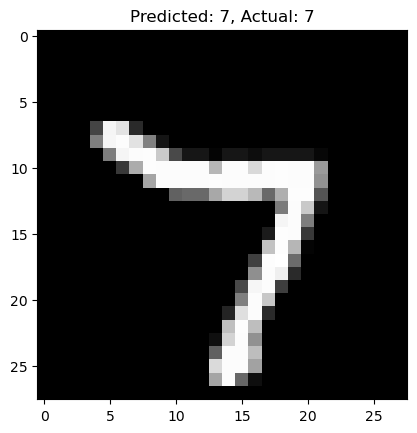

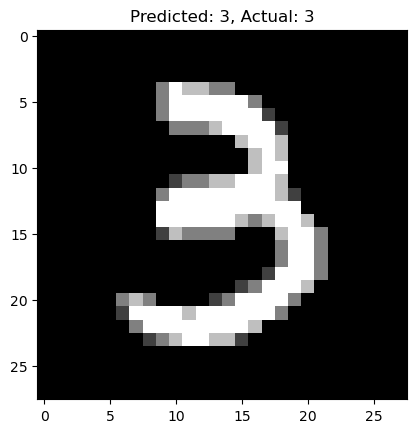

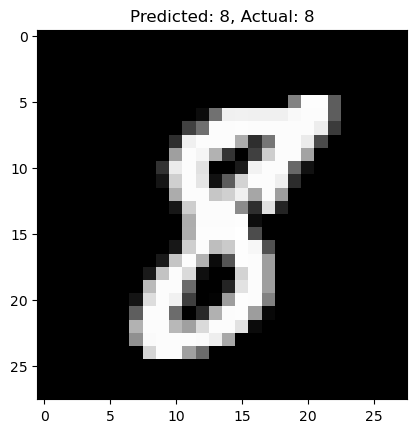

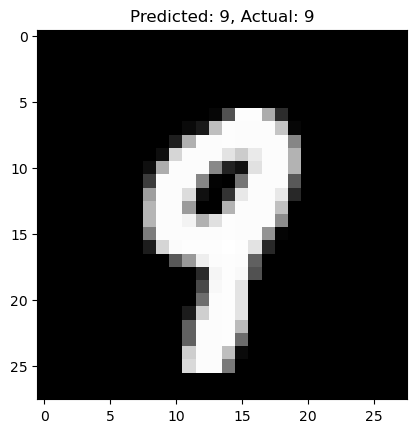

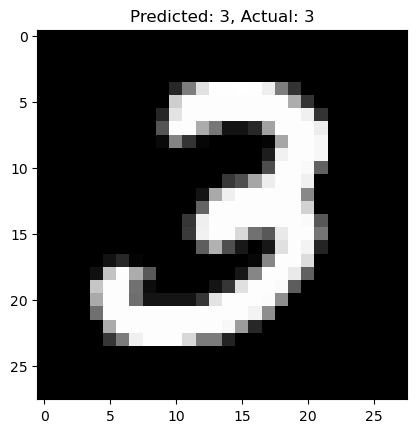

375/375 [==============================] - 2s 4ms/step - loss: 0.0912 - accuracy: 0.9755
Test Loss: 0.09119126200675964
Test Accuracy: 0.9754999876022339


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the path to the MNIST train.csv and test.csv files
train_data_path = 'mnist_train.csv'
test_data_path = 'mnist_test.csv'

# Load the MNIST training data from train.csv
train_data = pd.read_csv(train_data_path)
train_labels = train_data['label'].values
train_data = train_data.drop('label', axis=1).values

# Load the MNIST testing data from test.csv
test_data = pd.read_csv(test_data_path).values

# Convert the data and labels to appropriate types
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)
test_data = test_data.astype(np.float32)

# Normalize the pixel values between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

# Split the training data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_data, train_labels, batch_size=128, epochs=10)

# Make predictions on the test data
predictions = model.predict(test_data)

# Display the first five images with their predicted and actual labels
for i in range(5):
    image = test_data[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


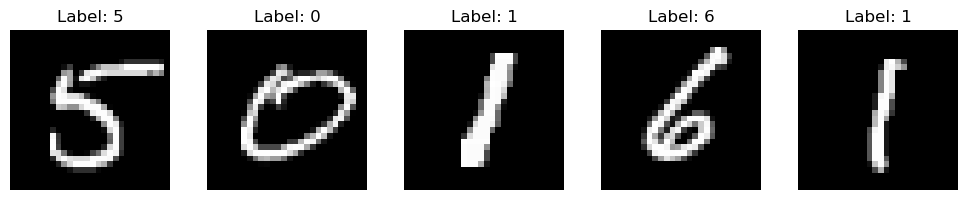

1500/1500 [==============================] - 4s 3ms/step
Train RMSE: 0.304617246174058
375/375 [==============================] - 1s 3ms/step
Test RMSE: 0.6486524493131897


In [35]:

# Display the first five images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(train_data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Calculate the RMSE
train_predictions = model.predict(train_data)
train_predictions = np.argmax(train_predictions, axis=1)
train_rmse = np.sqrt(mean_squared_error(train_labels, train_predictions))
print("Train RMSE:", train_rmse)



test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print("Test RMSE:", test_rmse)

Epoch 1/10
375/375 [==============================] - 28s 72ms/step - loss: 0.2356 - accuracy: 0.9306
Epoch 2/10
375/375 [==============================] - 28s 73ms/step - loss: 0.0656 - accuracy: 0.9795
Epoch 3/10
375/375 [==============================] - 27s 71ms/step - loss: 0.0449 - accuracy: 0.9861
Epoch 4/10
375/375 [==============================] - 27s 73ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 5/10
375/375 [==============================] - 27s 71ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 6/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 7/10
375/375 [==============================] - 22s 57ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 8/10
375/375 [==============================] - 23s 60ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 9/10
375/375 [==============================] - 23s 62ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 10/10
375/375 [==============================] - 2s 6ms/step


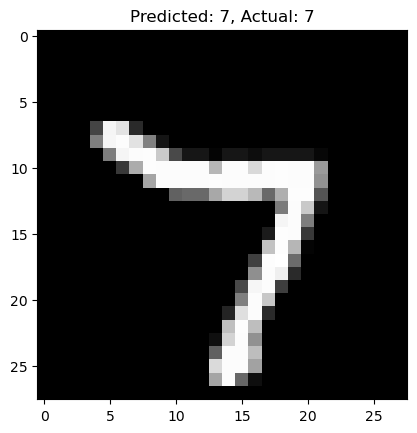

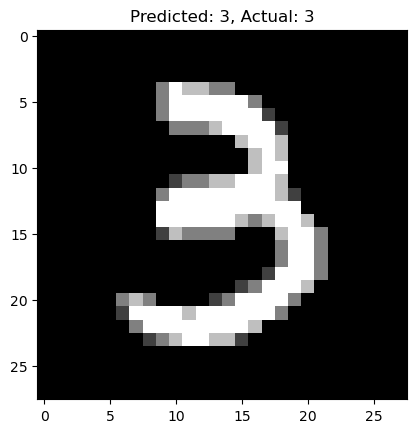

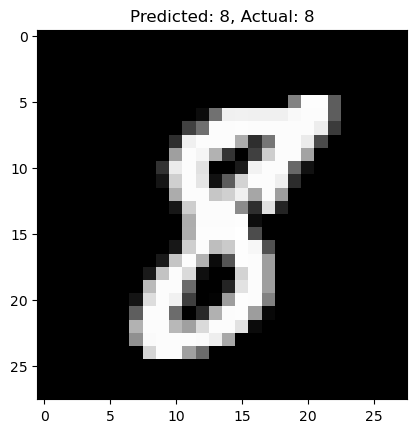

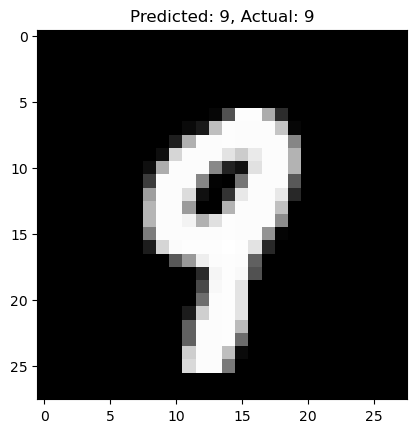

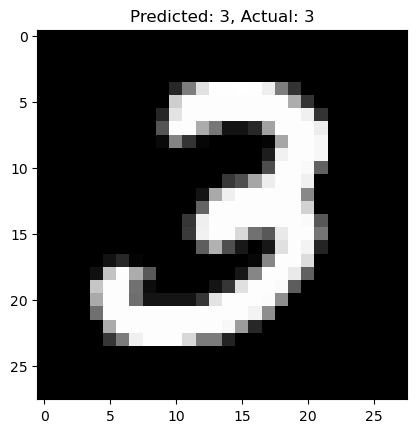

375/375 [==============================] - 2s 5ms/step - loss: 0.0409 - accuracy: 0.9896
Test Loss: 0.04091998189687729
Test Accuracy: 0.9895833134651184


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the path to the MNIST train.csv and test.csv files
train_data_path = 'mnist_train.csv'
test_data_path = 'mnist_test.csv'

# Load the MNIST training data from train.csv
train_data = pd.read_csv(train_data_path)
train_labels = train_data['label'].values
train_data = train_data.drop('label', axis=1).values

# Load the MNIST testing data from test.csv
test_data = pd.read_csv(test_data_path).values

# Convert the data and labels to appropriate types
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)
test_data = test_data.astype(np.float32)

# Normalize the pixel values between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

# Reshape the data for CNN input
train_data = train_data.reshape(-1, 28, 28, 1)
#test_data = test_data.reshape(-1, 28, 28, 1)

# Split the training data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_data, train_labels, batch_size=128, epochs=10)

# Make predictions on the test data
predictions = model.predict(test_data)

# Display the first five images with their predicted and actual labels
for i in range(5):
    image = test_data[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


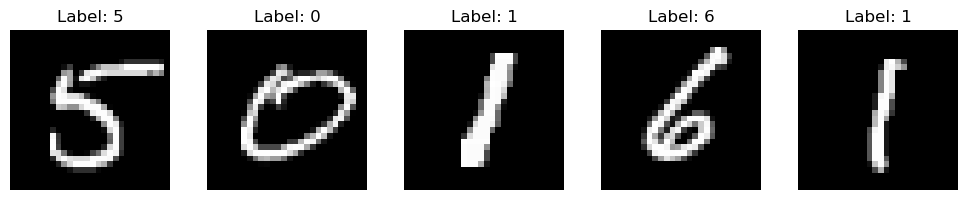

1500/1500 [==============================] - 8s 5ms/step
Train RMSE: 0.22656860623955238
375/375 [==============================] - 2s 5ms/step
Test RMSE: 0.44205957366249476


In [37]:

# Display the first five images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(train_data[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Calculate the RMSE
train_predictions = model.predict(train_data)
train_predictions = np.argmax(train_predictions, axis=1)
train_rmse = np.sqrt(mean_squared_error(train_labels, train_predictions))
print("Train RMSE:", train_rmse)



test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print("Test RMSE:", test_rmse)